# Simulación de procesos de ruina del jugador

### Definición de librerías y funciones

In [1]:
from numpy import array, diag, zeros, eye, where, linspace, ones
from numpy.linalg import pinv,svd
from matplotlib.pyplot import plot,spy,legend,title

### Definición de proceso genérico

In [2]:
def modelo_rdj(N,p=0.5):
    A = zeros((N+1,N+1))
    A[0,0] = A[N,N] = 1
    for j in range(N-1):
        A[j+1,j] = 1-p
        A[j+1,j+2] = p
    return A

In [3]:
# Fortuna máxima esperada por el jugador
N = 10
# Fortuna inicial del jugador
i = 2
# Probabilidad de ganar
p = 0.5
# Horizonte de tiempo de la simulación
T = 200

In [4]:
A = modelo_rdj(N,p)

In [5]:
A

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [6]:
q0 = zeros(N+1)
q0[i] = 1

In [7]:
q = zeros((T,N+1))
q[0,:] = q0
for k in range(T-1):
    q[k+1,:] = q[k,:]@A

Text(0.5, 1.0, 'Evolución de probabilidades $\\mathbf{p}(t)$')

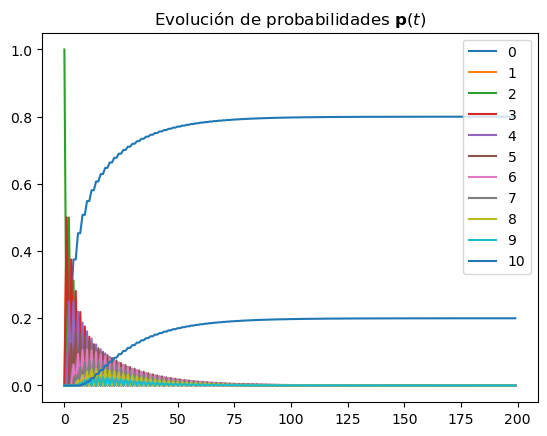

In [8]:
Legend = []
for j in range(N+1):
    Legend.append(str(j))
plot(q);legend(Legend);title('Evolución de probabilidades $\mathbf{p}(t)$')

Text(0.5, 1.0, 'Esperanza de Fortuna $\\mathbb{E}(f(t))$')

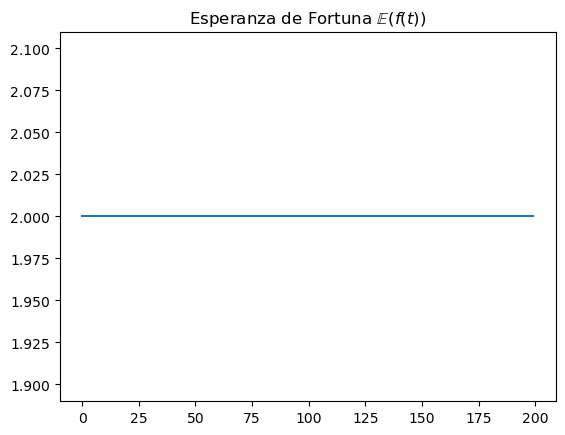

In [9]:
plot(q@linspace(0,N,N+1));title('Esperanza de Fortuna $\mathbb{E}(f(t))$')

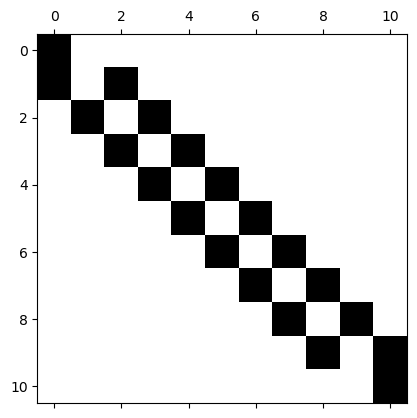

In [10]:
spy(A)

In [11]:
Ne = 100
Ar = pinv(q[:Ne,:])@q[1:(Ne+1),:]
Ar = Ar*(abs(Ar)>1e-11)
Ar

array([[ 0.97297297,  0.        ,  0.        ,  0.00965251,  0.01930502,
         0.02895753,  0.03861004,  0.04826255,  0.05791506,  0.02895753,
         0.10810811],
       [ 0.37837838, -0.        ,  0.5       ,  0.00772201,  0.01544402,
         0.02316602,  0.03088803,  0.03861004,  0.04633205,  0.02316602,
        -0.01351351],
       [ 0.        ,  0.5       , -0.        ,  0.5       , -0.        ,
        -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.12162162, -0.        ,  0.5       , -0.00772201,  0.48455598,
        -0.02316602, -0.03088803, -0.03861004, -0.04633205, -0.02316602,
         0.01351351],
       [ 0.02702703,  0.        , -0.        ,  0.49034749, -0.01930502,
         0.47104247, -0.03861004, -0.04826255, -0.05791506, -0.02895753,
        -0.10810811],
       [-0.06756757, -0.        , -0.        , -0.01158301,  0.47683398,
        -0.03474903,  0.45366795, -0.05791506, -0.06949807, -0.03474903,
        -0.229

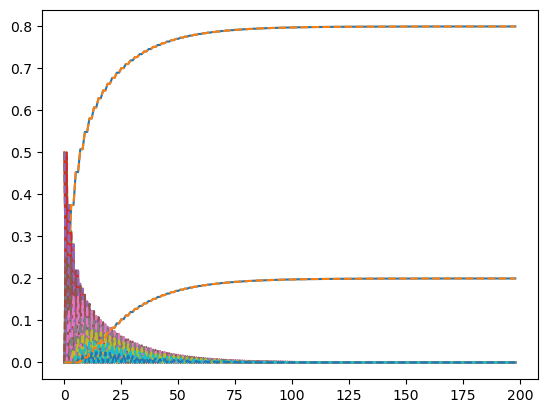

In [12]:
plot(q[1:,:]);plot(q[:-1,:]@Ar,'--');

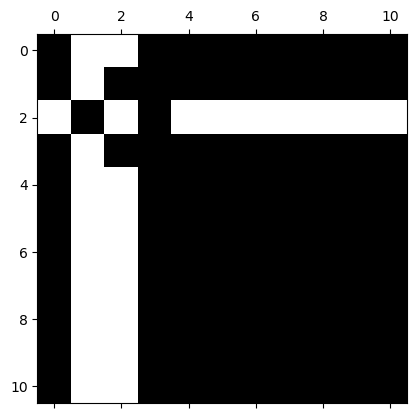

In [13]:
spy(Ar)

In [14]:
u,s,v = svd(eye(N+1,N+1)-A.T)

In [15]:
fs = where(s==0)[0]
pi = (v[fs,:]@q[-1,:])@v[fs,:]
pi = pi/sum(pi)
pi@A-pi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

([<matplotlib.lines.Line2D at 0x1e888fd4610>],
 <matplotlib.legend.Legend at 0x1e887fc1970>)

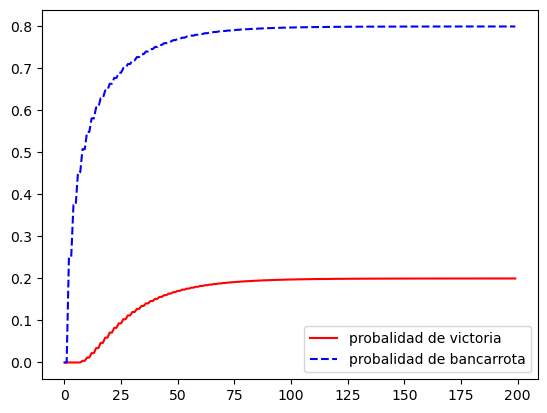

In [16]:
plot(q[:,-1],'r');plot(q[:,0],'b--'),legend(['probalidad de victoria','probalidad de bancarrota'])

In [17]:
pi

array([0.80001051, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.19998949])